In [66]:
# MACHINE LEARNING OPGAVE WEEK 2

import numpy as np
from random import randint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import sys
import pickle

from uitwerkingen import *

Helperfuncties die nodig zijn om de boel te laten werken
Hier hoef je niets aan te veranderen, maar bestudeer de code om een beeld te krijgen van de werking hiervan.

In [67]:

def initialize_random_weights(in_conn, out_conn):
    W = np.zeros((out_conn, 1 + out_conn))
    epsilon_init = 0.12
    W = np.random.rand(out_conn, 1+in_conn) * 2 * epsilon_init - epsilon_init
    return W

def display_data(X):
    m,n = X.shape
    for idx in range(0, m):
        plt.subplot(5, 5, idx+1)
        x = X[idx,:].reshape(20,20)
        plt.tick_params(which='both',left=False, bottom=False, top=False, labelleft=False, labelbottom=False)
        plt.imshow(x, cmap='gray', interpolation='nearest');

    plt.show()

itr = 1
costs = []
def callbackF(Xi):
    global itr, costs
    Theta1_size = hidden_layer_size * (input_layer_size + 1)
    Theta1 = Xi[:Theta1_size].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = Xi[Theta1_size:].reshape(num_labels, hidden_layer_size+1)
    cost = compute_cost(Theta1, Theta2, X, y)
    costs.append(cost)
    print(f"Iteration {itr} - Cost: {cost}")
    itr += 1

def plot_costs(costs):
    plt.plot(costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost reduction over iterations')
    plt.show()

def nn_cost_function(Thetas, X, y):
    global input_layer_size, hidden_layer_size, num_labels
    size = hidden_layer_size * (1+input_layer_size) # +1 want de bias-node zit wel in de matrix
    Theta1 = Thetas[:size].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = Thetas[size:].reshape(num_labels, hidden_layer_size+1)
    J = compute_cost(Theta1, Theta2, X, y)
    grad1, grad2 = nn_check_gradients(Theta1, Theta2, X, y)
    return J, np.concatenate( (grad1.flatten(), grad2.flatten()) ) 


In [68]:
#Laden van de data en zetten van de variabelen.
with open ('week2_data.pkl','rb') as f:
    data = pickle.load(f)

X,y = data['X'], data['y']

#Zetten van belangrijke variabelen
m,n = X.shape # aantal datapunten in de trainingsset
input_layer_size  = 400;  # 20x20 input plaatjes van getallen
hidden_layer_size = 25;   # verborgen laag van 25 units
num_labels = 10;          # 10 labels, 1 tot en met 10
                          # let op: '0' wordt opgeslagen als label 10.

# ========================  OPGAVE 1 ======================== 

Tekenen van data op regel range(0, 5000, 500)
Dit zou een 0 moeten zijn


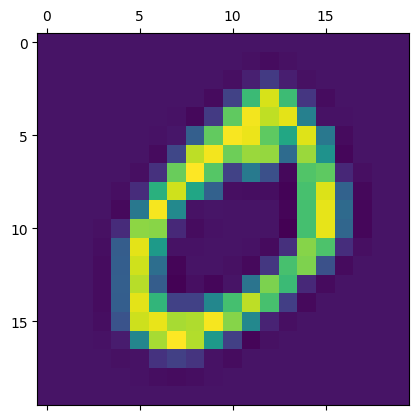

Dit zou een [1] moeten zijn


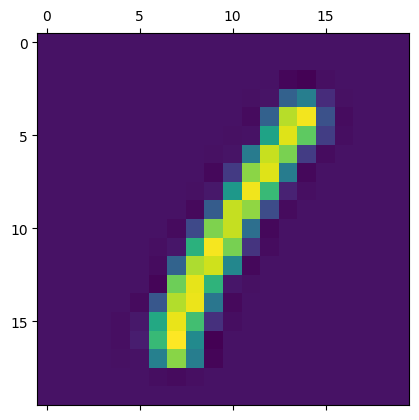

Dit zou een [2] moeten zijn


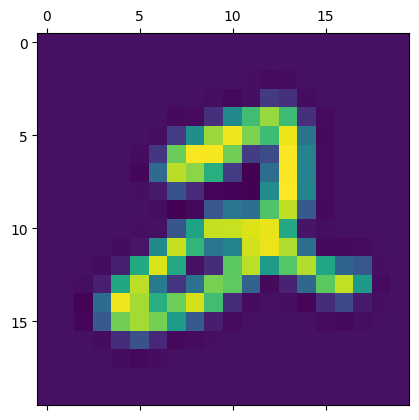

Dit zou een [3] moeten zijn


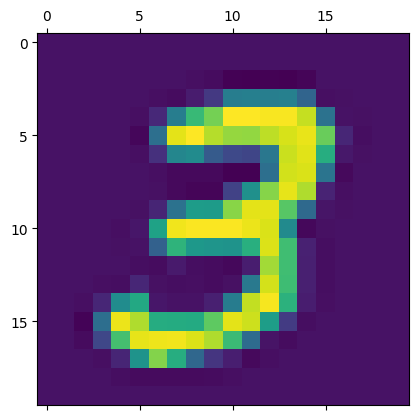

Dit zou een [4] moeten zijn


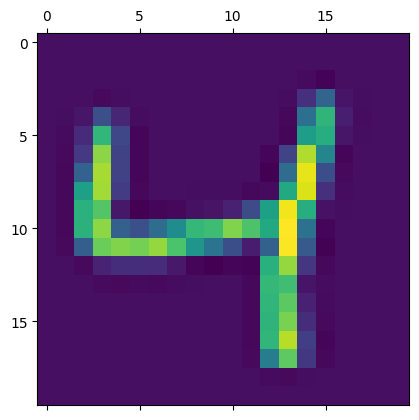

Dit zou een [5] moeten zijn


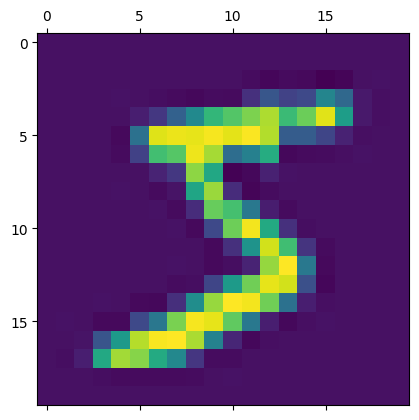

Dit zou een [6] moeten zijn


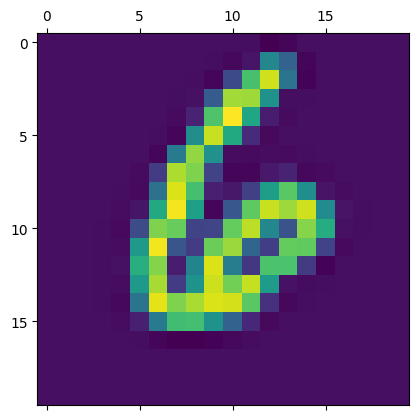

Dit zou een [7] moeten zijn


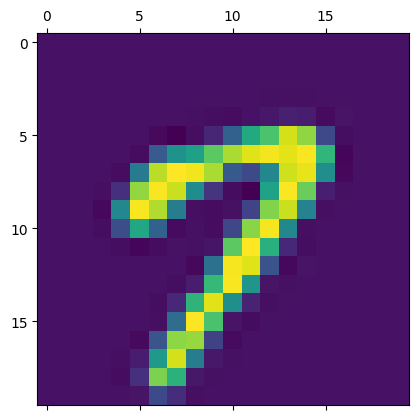

Dit zou een [8] moeten zijn


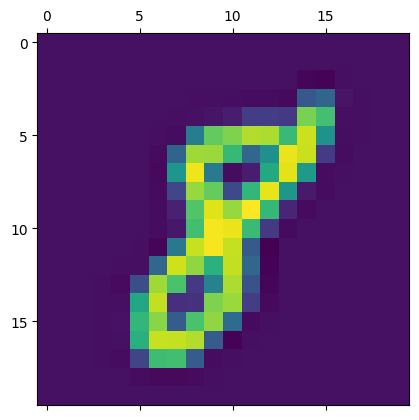

Dit zou een [9] moeten zijn


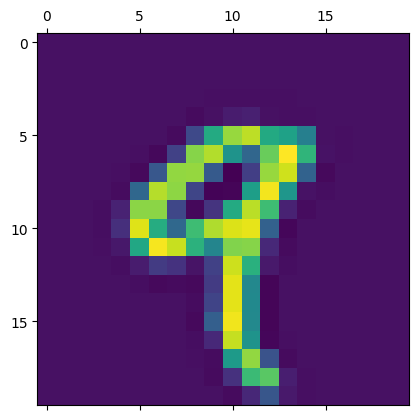

In [69]:

rnd = range(0, X.shape[0], 500)
print (f"Tekenen van data op regel {rnd}")
if (len(sys.argv)>1 and sys.argv[1]=='skip') :
    print ("Slaan we over")
else:
    for i in rnd:
        hyp = y[i]
        if (hyp == 10): hyp = 0
        print (f"Dit zou een {hyp} moeten zijn")
        plot_number(X[i,:])

# rnd = randint(0, X.shape[0])
# print (f"Tekenen van data op regel {rnd}")
# if (len(sys.argv)>1 and sys.argv[1]=='skip') :
#     print ("Slaan we over")
# else:
#     hyp = y[rnd]
#     if (hyp==10): hyp=0
#     print (f"Dit zou een {hyp} moeten zijn.")
#     plot_number(X[rnd,:])

# input ("Druk op Return om verder te gaan...") 

# ========================  OPGAVE 2a ======================== 


In [70]:
print ("")
print ("Sigmoid-functie met een relatief groot negatief getal zou bijna 0 moeten zijn")
print (f"Sigmoid van -10 = {sigmoid(-10)}")

print ("Sigmoid-functie van 0 zou 0,5 moeten zijn.")
print (f"Sigmoid van 0 = {sigmoid(0)}")

print ("Sigmoid-functie met een relatief groot positief getal zou bijna 1 moeten zijn")
print (f"Sigmoid van 10 = {sigmoid(10)}")

print ("Simoid aangeroepen met 1×3 vector [-10, 0, 10]")
print (sigmoid(np.matrix( [-10, 0, 10] )))
print ("Simoid aangeroepen met 3×1 vector [-10, 0, 10]")
print (sigmoid(np.matrix( ([-10], [0], [10]) )))

# input ("Druk op Return om verder te gaan...") 


Sigmoid-functie met een relatief groot negatief getal zou bijna 0 moeten zijn
Sigmoid van -10 = 4.5397868702434395e-05
Sigmoid-functie van 0 zou 0,5 moeten zijn.
Sigmoid van 0 = 0.5
Sigmoid-functie met een relatief groot positief getal zou bijna 1 moeten zijn
Sigmoid van 10 = 0.9999546021312976
Simoid aangeroepen met 1×3 vector [-10, 0, 10]
[[4.53978687e-05 5.00000000e-01 9.99954602e-01]]
Simoid aangeroepen met 3×1 vector [-10, 0, 10]
[[4.53978687e-05]
 [5.00000000e-01]
 [9.99954602e-01]]


# ========================  OPGAVE 2b ======================== 

In [71]:
print ("")
print ("Aanroepen van de methode predict_number met de y-vector")
print ("en het weergeven van de dimensionaliteit van het resultaat")
matr = get_y_matrix(y, m)
print (matr.shape)
print ("Dit zou (5000,10) moeten zijn.")
# input ("Druk op Return om verder te gaan.")


Aanroepen van de methode predict_number met de y-vector
en het weergeven van de dimensionaliteit van het resultaat
(5000, 10)
Dit zou (5000,10) moeten zijn.


# ========================  OPGAVE 2c ======================== 

In [72]:
print("")
print ("Zetten van initiële waarden van de Theta's.")
Theta1 = initialize_random_weights(input_layer_size, hidden_layer_size)
Theta2 = initialize_random_weights(hidden_layer_size, num_labels)
print("Theta1:" + str(Theta1.shape))
print("Theta2:" + str(Theta2.shape))

print ("Aanroepen van de methode predict_number")
pred = np.argmax(predict_number(Theta1,Theta2,X), axis=1).reshape(m,1)
cost = compute_cost(Theta1, Theta2, X, y)

print (f"De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn {cost}")
print ("Dit zou zo rond de 7 moeten liggen.")
acc = np.count_nonzero([pred - y == 0])
print (f"Correct geclassificeerd: {acc}")
print (f"De huidige accuratessse van het netwerk is {100 * acc/ m} %")
# input ("Druk op Return om verder te gaan.")


Zetten van initiële waarden van de Theta's.
Theta1:(25, 401)
Theta2:(10, 26)
Aanroepen van de methode predict_number
De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn 7.075748806542174
Dit zou zo rond de 7 moeten liggen.
Correct geclassificeerd: 500
De huidige accuratessse van het netwerk is 10.0 %


# ========================  OPGAVE 3 ======================== 

In [73]:
print ("")
print ("Aanroepen van de methode sigmoid_gradient met de waarden [-1, -0.5, 0, 0.5, 1 ]")
print (sigmoid_gradient(np.array([ [-1, -0.5, 0, 0.5, 1 ] ])))
print ("Dit zou als resultaat de volgende lijst moeten hebben")
print ("[ 0.19661193  0.23500371  0.25  0.23500371  0.19661193]")
# input ("Druk op Return om verder te gaan...")

print ("")
print ("Aanroepen van de methode nn_check_gradients met initiële waarden van de Theta's.")
g1, g2 =  nn_check_gradients(Theta1, Theta2, X, y)
print (f"De totale som van de eerste gradiënt-matrix is {sum(g1)}")
print (f"De totale som van de tweede gradiënt-matrix is {sum(g2)}")
# input ("Druk op Return om verder te gaan...")


Aanroepen van de methode sigmoid_gradient met de waarden [-1, -0.5, 0, 0.5, 1 ]
[[0.19661193 0.23500371 0.25       0.23500371 0.19661193]]
Dit zou als resultaat de volgende lijst moeten hebben
[ 0.19661193  0.23500371  0.25  0.23500371  0.19661193]

Aanroepen van de methode nn_check_gradients met initiële waarden van de Theta's.
De totale som van de eerste gradiënt-matrix is [ 4.15549185e-02  0.00000000e+00  0.00000000e+00 -1.45096068e-08
  1.03157664e-07 -2.38236209e-07  1.09009106e-05  1.17560153e-05
  2.82003410e-06  1.47604634e-06  6.92870173e-07  1.25858020e-07
 -5.50173463e-07 -1.62857629e-06 -2.59573444e-06 -4.21915432e-06
 -3.47588807e-06 -9.78820074e-07 -9.77472236e-09  1.07396545e-08
  0.00000000e+00  7.98468190e-09 -8.20061173e-08  1.70505141e-07
 -3.12004367e-06 -2.48051824e-06  2.01233051e-05  5.97609523e-05
  8.53221710e-05  6.78659770e-05  1.96488509e-05 -2.01108804e-06
  1.97866667e-06  6.18023662e-06 -1.59285316e-06  4.66727105e-06
  8.40587648e-06 -1.34351861e-06 -3.

# ========================  OPGAVE 4 ======================== 


Gebruik scipy.optimize.minimize om het netwerk te trainen...
Iteration 1 - Cost: 3.297163878746424
Iteration 2 - Cost: 3.246705223121343
Iteration 3 - Cost: 3.1741276387083697
Iteration 4 - Cost: 2.70551126838658
Iteration 5 - Cost: 2.408054388561681
Iteration 6 - Cost: 2.001435294984236
Iteration 7 - Cost: 1.5796250164438386
Iteration 8 - Cost: 1.4777769433815073
Iteration 9 - Cost: 1.3892863238269624
Iteration 10 - Cost: 1.2277555421820934
Iteration 11 - Cost: 1.1152527259030418
Iteration 12 - Cost: 1.027519719404268
Iteration 13 - Cost: 0.9584550960993221
Iteration 14 - Cost: 0.8750690907331107
Iteration 15 - Cost: 0.8371796493093955
Iteration 16 - Cost: 0.7982759802775915
Iteration 17 - Cost: 0.7554639917882964
Iteration 18 - Cost: 0.7043542581167634
Iteration 19 - Cost: 0.6562061580743375
Iteration 20 - Cost: 0.6258449356800475
Iteration 21 - Cost: 0.6049892310624652
Iteration 22 - Cost: 0.5854688401063248
Iteration 23 - Cost: 0.5707102050145201
Iteration 24 - Cost: 0.55465175592

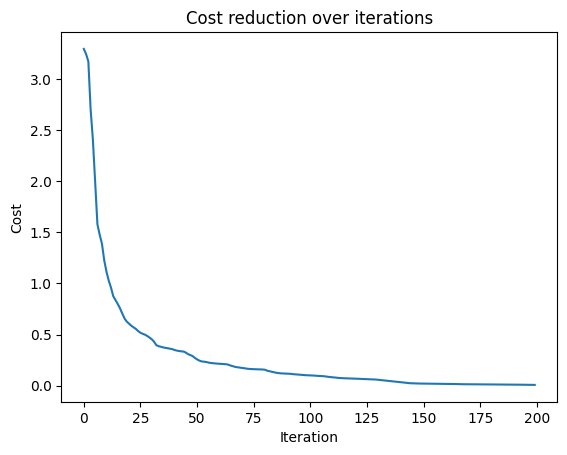

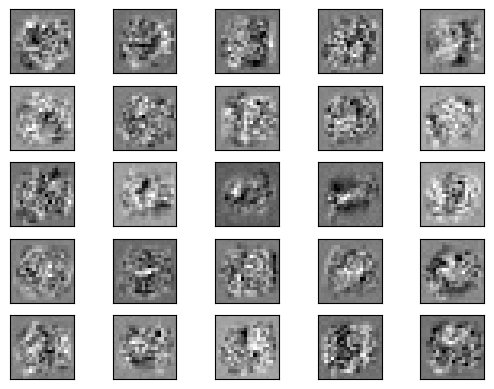

In [74]:
init_params = np.concatenate( (Theta1.flatten(), Theta2.flatten()) )
args = (X, y)
print ("")
print ("Gebruik scipy.optimize.minimize om het netwerk te trainen...")

def min_res(maximeterValue):
    res = minimize(nn_cost_function, init_params, args=args, method='CG', callback=callbackF, jac=True, options={'maxiter':maximeterValue,'disp':True})
    size = hidden_layer_size * (input_layer_size+1) #voor de bias-node die wel in de matrix zit maar niet geplot moet worden
    res_Theta1 = res['x'][:size].reshape(hidden_layer_size, input_layer_size+1)
    res_Theta2 = res['x'][size:].reshape(num_labels, hidden_layer_size+1)

    print ("Training compleet. ")

    cost = compute_cost(res_Theta1, res_Theta2, X, y) 
    print (f"De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn {cost}")
    print ("Dit zou een stuk lager moeten zijn dan in het begin.")

    pred = np.argmax(predict_number(res_Theta1,res_Theta2,X), axis=1)+1
    pred = pred.reshape(m,1)
    acc = np.count_nonzero([pred - y == 0])
    print (f"correct geclassificeerd: {acc} van de {m}")
    print (f"De huidige accuratessse van het netwerk is {100 * acc/ m} %")
    print ("Dat zou een stuk hoger moeten zijn dan in het begin.")
    print ("Plotten van de waarden van de gewichten in de verborgen laag (hidden layer)")

    plot_costs(costs)
    display_data(res_Theta1[:,1:])
    plt.show()

min_res(200)

# ========================  OPGAVE 4 ======================== 

In [ ]:
init_params = np.concatenate( (Theta1.flatten(), Theta2.flatten()) )
args = (X, y)
print ("")
print ("Gebruik scipy.optimize.minimize om het netwerk te trainen...")

def min_res(maximeterValue):
    res = minimize(nn_cost_function, init_params, args=args, method='CG', callback=callbackF, jac=True, options={'maxiter':maximeterValue,'disp':True})
    size = hidden_layer_size * (input_layer_size+1) #voor de bias-node die wel in de matrix zit maar niet geplot moet worden
    res_Theta1 = res['x'][:size].reshape(hidden_layer_size, input_layer_size+1)
    res_Theta2 = res['x'][size:].reshape(num_labels, hidden_layer_size+1)

    print ("Training compleet. ")

    cost = compute_cost(res_Theta1, res_Theta2, X, y) 
    print (f"De kosten die gemoeid zijn met de huidige waarden van Theta1 en Theta2 zijn {cost}")
    print ("Dit zou een stuk lager moeten zijn dan in het begin.")

    pred = np.argmax(predict_number(res_Theta1,res_Theta2,X), axis=1)+1
    pred = pred.reshape(m,1)
    acc = np.count_nonzero([pred - y == 0])
    print (f"correct geclassificeerd: {acc}")
    print (f"De huidige accuratessse van het netwerk is {100 * acc/ m} %")
    print ("Dat zou een stuk hoger moeten zijn dan in het begin.")
    print ("Plotten van de waarden van de gewichten in de verborgen laag (hidden layer)")

    display_data(res_Theta1[:,1:]) 

min_res(20)
min_res(50)
min_res(100)